# Libs utilizadas

In [4]:
# Bibliotecas padrão
import os

# Bibliotecas científicas
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: pré-processamento, modelos e validação
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Entendimento do problema
### Contexto 
Empresa forneceu que houve um aumento de 35% na taxa de attrition no último ano;
### Objetivo do projeto
Aplicar técnicas de Machine Learning supervisionado para classificar os colaboradores de acordo com o risco de desligamento;
### Objetivo do notebook
1. Analise exploratória
2. Feature Engineering
3. Separção da base

### Sobre attrition
- Attrition é a metrica que fala da rotatividade de funcionários;
- A metrica attrition é uma variável binária (Sim ou Não);
    - sim = saiu da empresa
    - não = não saiu da empresa
- O modelo deve ter como target a variável attrition;
- Neste caso podemos utilizar modelos **supervisionados de classificação**;

# Carregando o dataset
- Dataset foi criado no arquivo `01-gera_dataset.ipynb`

In [5]:
#df = pd.read_csv("data/ibm.csv", sep=";")
df = pd.read_parquet('./data/ibm.parquet')

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,42,No,Travel_Rarely,575,Research & Development,1,3,Marketing,1,1,...,2,80,1,24,3,4,5,0,3,0
1,36,No,Travel_Rarely,535,Human Resources,2,4,Human Resources,1,2,...,4,80,1,18,5,2,17,8,7,3
2,44,No,Travel_Rarely,286,Research & Development,2,4,Medical,1,3,...,1,80,2,22,3,3,20,0,1,0
3,53,Yes,Travel_Frequently,746,Sales,11,2,Medical,1,4,...,4,80,0,31,1,3,3,3,0,3
4,35,No,Travel_Rarely,408,Research & Development,7,5,Technical Degree,1,5,...,2,80,1,17,2,1,14,5,3,5


# Análise Exploratória

## Informações básicas do dataset

#### Metodo nunique() visa:
- Identificar se colunas tem sempre mesmo valor;
- Avaliar cardinalidade de variáveis (detectar colunas de ID);

In [8]:
df.nunique().sort_values()

Over18                            1
StandardHours                     1
EmployeeCount                     1
Attrition                         2
PerformanceRating                 2
Gender                            2
OverTime                          2
MaritalStatus                     3
Department                        3
BusinessTravel                    3
StockOptionLevel                  4
WorkLifeBalance                   4
JobInvolvement                    4
JobSatisfaction                   4
RelationshipSatisfaction          4
EnvironmentSatisfaction           4
Education                         5
JobLevel                          5
EducationField                    6
TrainingTimesLastYear             7
JobRole                           7
YearsWithCurrManager              8
YearsSinceLastPromotion           8
NumCompaniesWorked               10
YearsInCurrentRole               11
PercentSalaryHike                15
YearsAtCompany                   21
DistanceFromHome            

#### Colunas para drop
- Colunas com mesmo valor: StandardHours, EmployeeCount, Over18 os valores são sempre 1
- Coluna de index: EmployeeNumber (no dataset de 1m apresenta 1m de valores)

In [9]:
columns_without_info = ["StandardHours", "EmployeeCount", "Over18", "EmployeeNumber"]

In [10]:
df = df.drop(columns=columns_without_info)

#### Metodo info() visa:
- Detectar nulos na base
- Identificar data type das variáveis
- Verificar o número total de linhas

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   Age                       1000000 non-null  int32 
 1   Attrition                 1000000 non-null  object
 2   BusinessTravel            1000000 non-null  object
 3   DailyRate                 1000000 non-null  int32 
 4   Department                1000000 non-null  object
 5   DistanceFromHome          1000000 non-null  int32 
 6   Education                 1000000 non-null  int32 
 7   EducationField            1000000 non-null  object
 8   EnvironmentSatisfaction   1000000 non-null  int32 
 9   Gender                    1000000 non-null  object
 10  HourlyRate                1000000 non-null  int32 
 11  JobInvolvement            1000000 non-null  int32 
 12  JobLevel                  1000000 non-null  int32 
 13  JobRole                   1000000 non-null 

In [12]:
print("ANÁLISE DE VALORES AUSENTES")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("Não há valores ausentes no dataset!")
else:
    print(missing_values[missing_values > 0])

ANÁLISE DE VALORES AUSENTES
Não há valores ausentes no dataset!


### Método describe() visa:
- Entender variabilidade dos dados;
- Entender a escala dos dados;

In [13]:
df.describe().T.sort_values(by=["std"], ascending=False)

,count,mean,std,min,25%,50%,75%,max
MonthlyRate,1000000.0,14504.885874,7210.287533,2000.0,8266.0,14516.0,20745.0,26999.0
MonthlyIncome,1000000.0,11311.698693,2585.337246,1258.0,9612.0,11336.0,12929.0,20000.0
DailyRate,1000000.0,800.110722,404.135932,100.0,451.0,800.0,1150.0,1499.0
HourlyRate,1000000.0,64.528856,20.204914,30.0,47.0,65.0,82.0,99.0
Age,1000000.0,37.573109,9.752131,18.0,31.0,37.0,44.0,65.0
TotalWorkingYears,1000000.0,17.646932,9.711037,0.0,11.0,17.0,24.0,47.0
DistanceFromHome,1000000.0,7.389395,6.487020,1.0,3.0,5.0,10.0,29.0
YearsAtCompany,1000000.0,8.291746,5.723518,0.0,3.0,8.0,13.0,20.0
PercentSalaryHike,1000000.0,14.960437,3.132714,11.0,13.0,15.0,17.0,25.0
YearsInCurrentRole,1000000.0,3.712092,2.980426,0.0,1.0,3.0,6.0,10.0


#### Identificando data types

In [14]:
df["Attrition"] = df["Attrition"].map({"No":0, "Yes":1})

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"VARIÁVEIS NUMÉRICAS ({len(numeric_cols)})")
print(numeric_cols.tolist())

VARIÁVEIS NUMÉRICAS (1)
['Attrition']


In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"VARIÁVEIS CATEGÓRICAS ({len(categorical_cols)})")
print(categorical_cols.tolist())

VARIÁVEIS CATEGÓRICAS (7)
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


## Análise da variável alvo

In [17]:
print("Percentual de Attrition na base")
df['Attrition'].map({0:"Não",1:"Sim"}).value_counts(normalize=True) *100

Percentual de Attrition na base


Attrition
Não    82.1159
Sim    17.8841
Name: proportion, dtype: float64

Dataset é desbalanceado. Com 17,88% de attrition na base

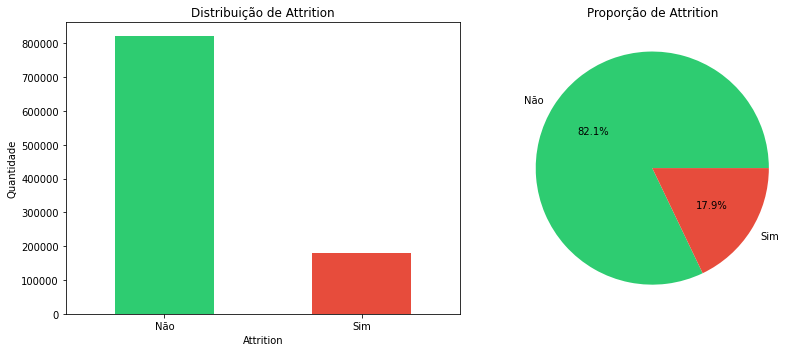

In [18]:
attrition_counts = df['Attrition'].map({0:"Não",1:"Sim"}).value_counts()

# Visualização da distribuição
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
attrition_counts.plot(kind='bar', ax=ax[0], color=['#2ecc71', '#e74c3c'])
ax[0].set_title('Distribuição de Attrition')
ax[0].set_ylabel('Quantidade')
ax[0].set_xticklabels(['Não', 'Sim'], rotation=0)

# Gráfico de pizza
attrition_counts.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
ax[1].set_title('Proporção de Attrition')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

## Análise de variáveis numéricas

In [19]:
correlacoes = df[numeric_cols].corr()[["Attrition"]].sort_values(by=["Attrition"])
correlacoes = correlacoes[correlacoes["Attrition"] != 1].reset_index()
correlacoes.columns = ["column_name", "correlation"]
uniques = df.nunique().to_frame().reset_index()
uniques.columns = ["column_name","qtd_uniques"]
corr_unique = correlacoes.merge(uniques, on="column_name")

In [20]:
corr_unique

,correlation,column_name,qtd_uniques


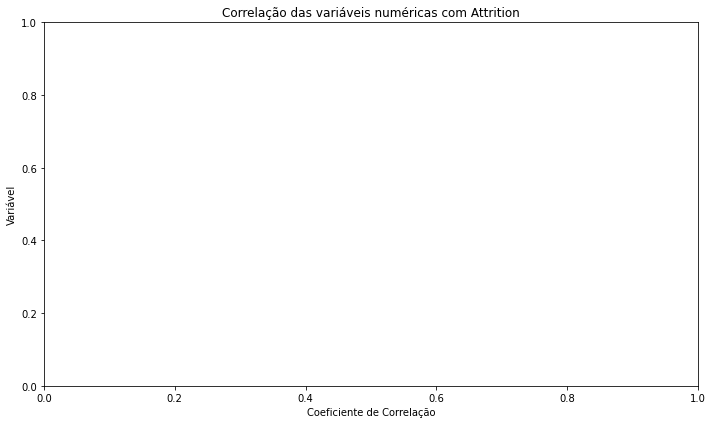

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_unique.sort_values(by="correlation", ascending=False),
            x='correlation', 
            y='column_name', 
            color='skyblue')

plt.title("Correlação das variáveis numéricas com Attrition")
plt.xlabel("Coeficiente de Correlação")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

In [22]:
variavel_numerica_low_categories = corr_unique[corr_unique["qtd_uniques"] < 8]["column_name"]

## Analise variáveis com poucas categorias

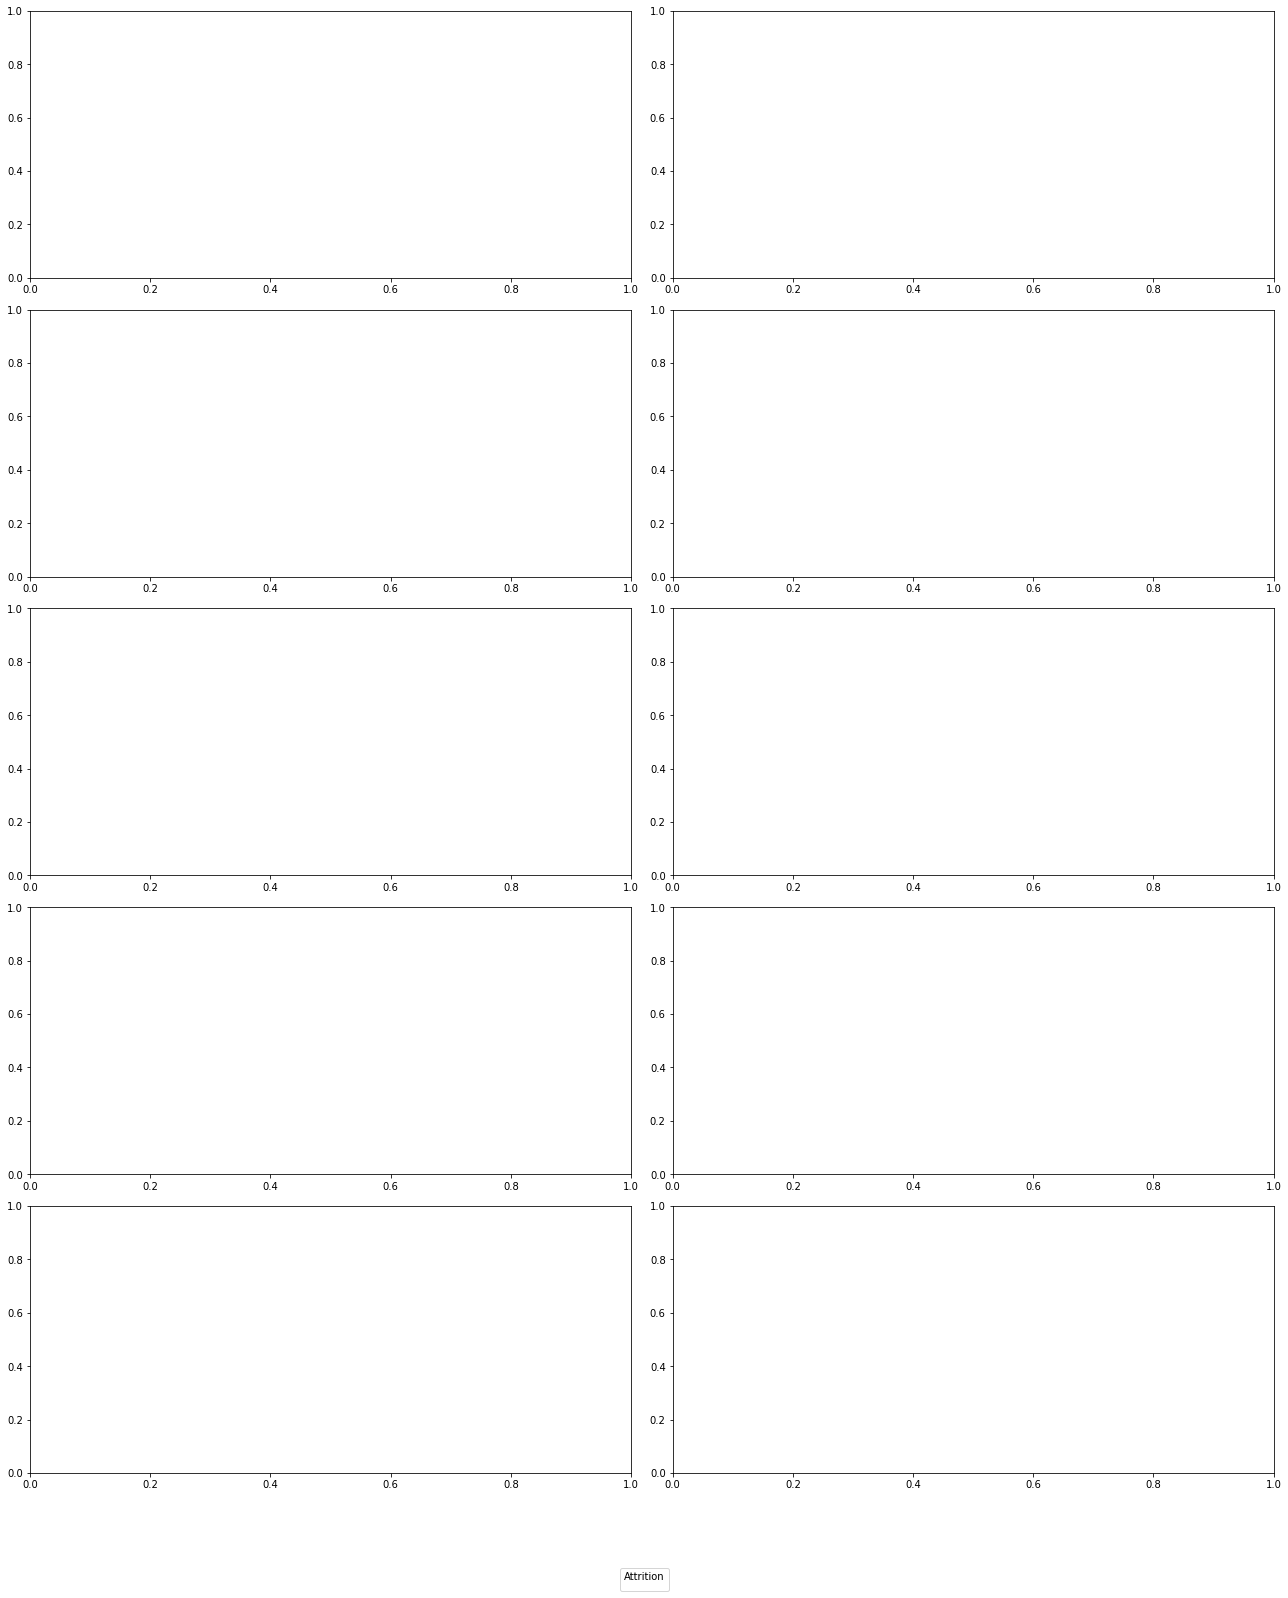

In [23]:
fig, axes = plt.subplots(5, 2, figsize=(18, 22))
axes = axes.flatten()

for i, col in enumerate(variavel_numerica_low_categories):
    prop_df = (df.groupby([col, 'Attrition'])
               .size()
               .groupby(level=0)
               .apply(lambda x: x / x.sum())
               .unstack()
               .reset_index(drop=True)
              )
    
    colors = sns.color_palette("pastel")
    prop_df.plot(kind='bar', stacked=True, ax=axes[i], color=colors, legend=False)
    
    axes[i].set_title(f'Proporção de Attrition por {col}')
    axes[i].set_ylabel('Proporção')
    axes[i].set_xlabel(col)
    
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Attrition', loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.01))

plt.tight_layout(rect=[0, 0.05, 1, 1]) 
plt.show()

- JobLevel: Funcionários em cargos mais altos apresentam menor taxa de attrition, sugerindo que senioridade está associada a maior retenção.
- StockOptionLevel: Colaboradores com níveis 2 ou 3 de opções de ações têm menor propensão a deixar a empresa quando comparados aos que possuem nível 0, indicando possível efeito motivacional do benefício.
- JobSatisfaction: Funcionários com satisfação no trabalho igual a 0 apresentam taxas significativamente mais altas de attrition, evidenciando a importância do engajamento com o cargo.
- Education: O nível educacional 4 está associado a uma menor taxa de attrition, o que pode refletir maior alinhamento entre qualificação e expectativas de carreira.
- EnvironmentSatisfaction: Funcionários que atribuem nota 0 para satisfação com o ambiente de trabalho têm maior tendência a sair da empresa, reforçando a relevância do clima organizacional na retenção.

In [24]:
# fig, axes = plt.subplots(5, 1, figsize=(6, 14))
# axes = axes.flatten()

# for i, col in enumerate(['JobLevel', 'StockOptionLevel','JobSatisfaction','Education','EnvironmentSatisfaction']):
#     prop_df = (df.groupby([col, 'Attrition'])
#                .size()
#                .groupby(level=0)
#                .apply(lambda x: x / x.sum())
#                .unstack()
#                .reset_index(drop=True)
#               )
    
#     colors = sns.color_palette("pastel")
#     prop_df.plot(kind='bar', stacked=True, ax=axes[i], color=colors, legend=False)
    
#     axes[i].set_title(f'Proporção de Attrition por {col}')
#     axes[i].set_ylabel('Proporção')
#     axes[i].set_xlabel(col)
    
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title='Attrition', loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.01))

# plt.tight_layout(rect=[0, 0.05, 1, 1]) 
# plt.show()

## Analise variável numérica continua

In [25]:
variavel_numerica_continua = corr_unique[(corr_unique["qtd_uniques"] >= 8)&
                                         (~corr_unique["correlation"].between(-0.001, 0.001))
                                        ]["column_name"]       

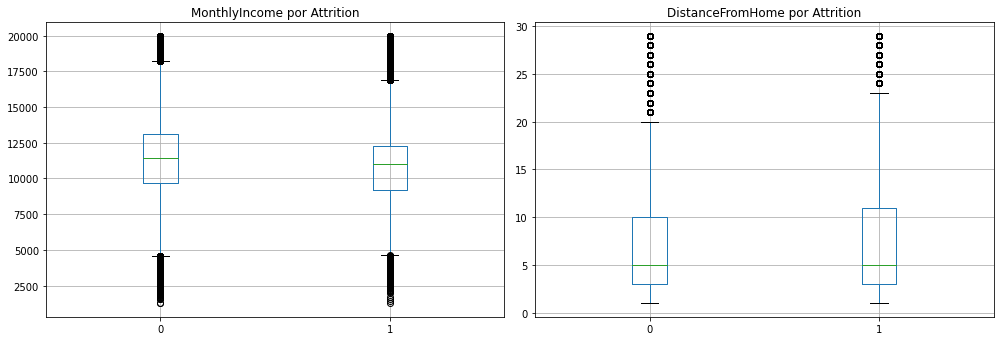

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes = axes.ravel()
for idx, col in enumerate(['MonthlyIncome','DistanceFromHome']):
    df.boxplot(column=col, by='Attrition', ax=axes[idx])
    axes[idx].set_title(f'{col} por Attrition')
    axes[idx].set_xlabel('')

plt.suptitle('')
plt.tight_layout()
plt.show()

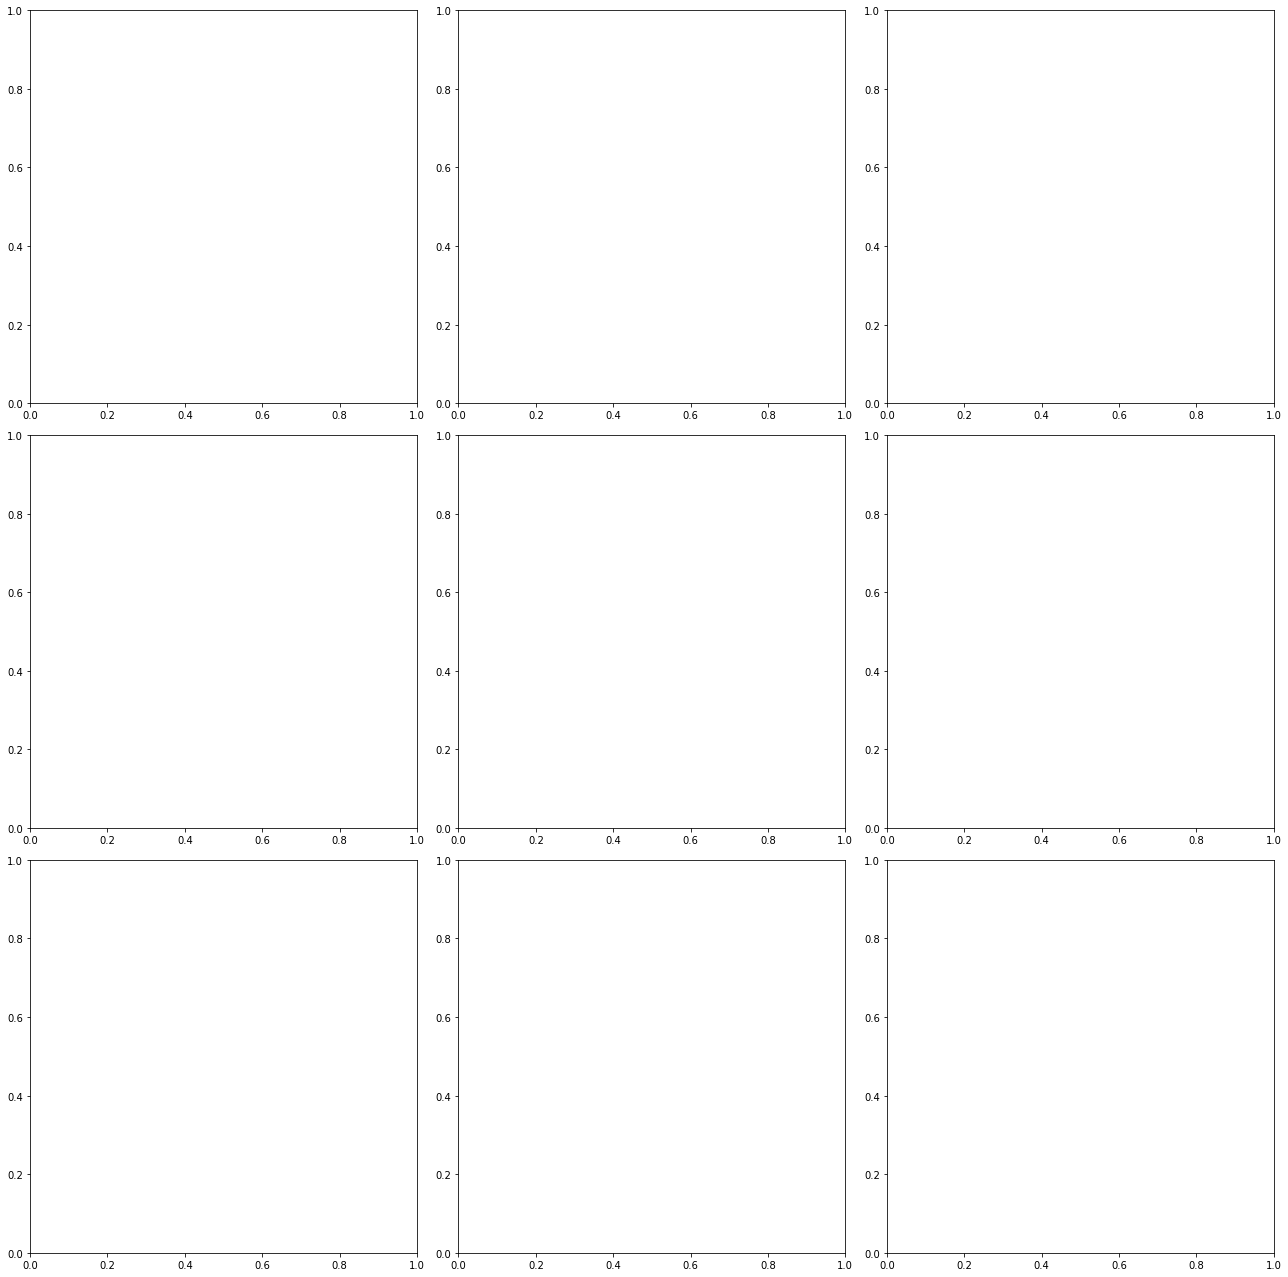

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.ravel()
for idx, col in enumerate(variavel_numerica_continua):
    df.boxplot(column=col, by='Attrition', ax=axes[idx])
    axes[idx].set_title(f'{col} por Attrition')
    axes[idx].set_xlabel('')

plt.suptitle('')
plt.tight_layout()
plt.show()

- MonthlyIncome: A mediana da remuneração mensal é significativamente mais alta entre os funcionários que permaneceram na empresa, indicando que salários mais baixos estão associados a maior propensão ao attrition.
- DistanceFromHome: Funcionários que saíram da empresa apresentam valores mais altos no quarto quartil da distância de casa ao trabalho, sugerindo que longos deslocamentos podem estar relacionados à rotatividade.

### Analise correlações entre variaveis
Objetivo:
- Detectar multicolinearidade
- Pré-seleção de features

C:\Users\Desktop\AppData\Roaming\Python\Python38\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Desktop\AppData\Roaming\Python\Python38\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


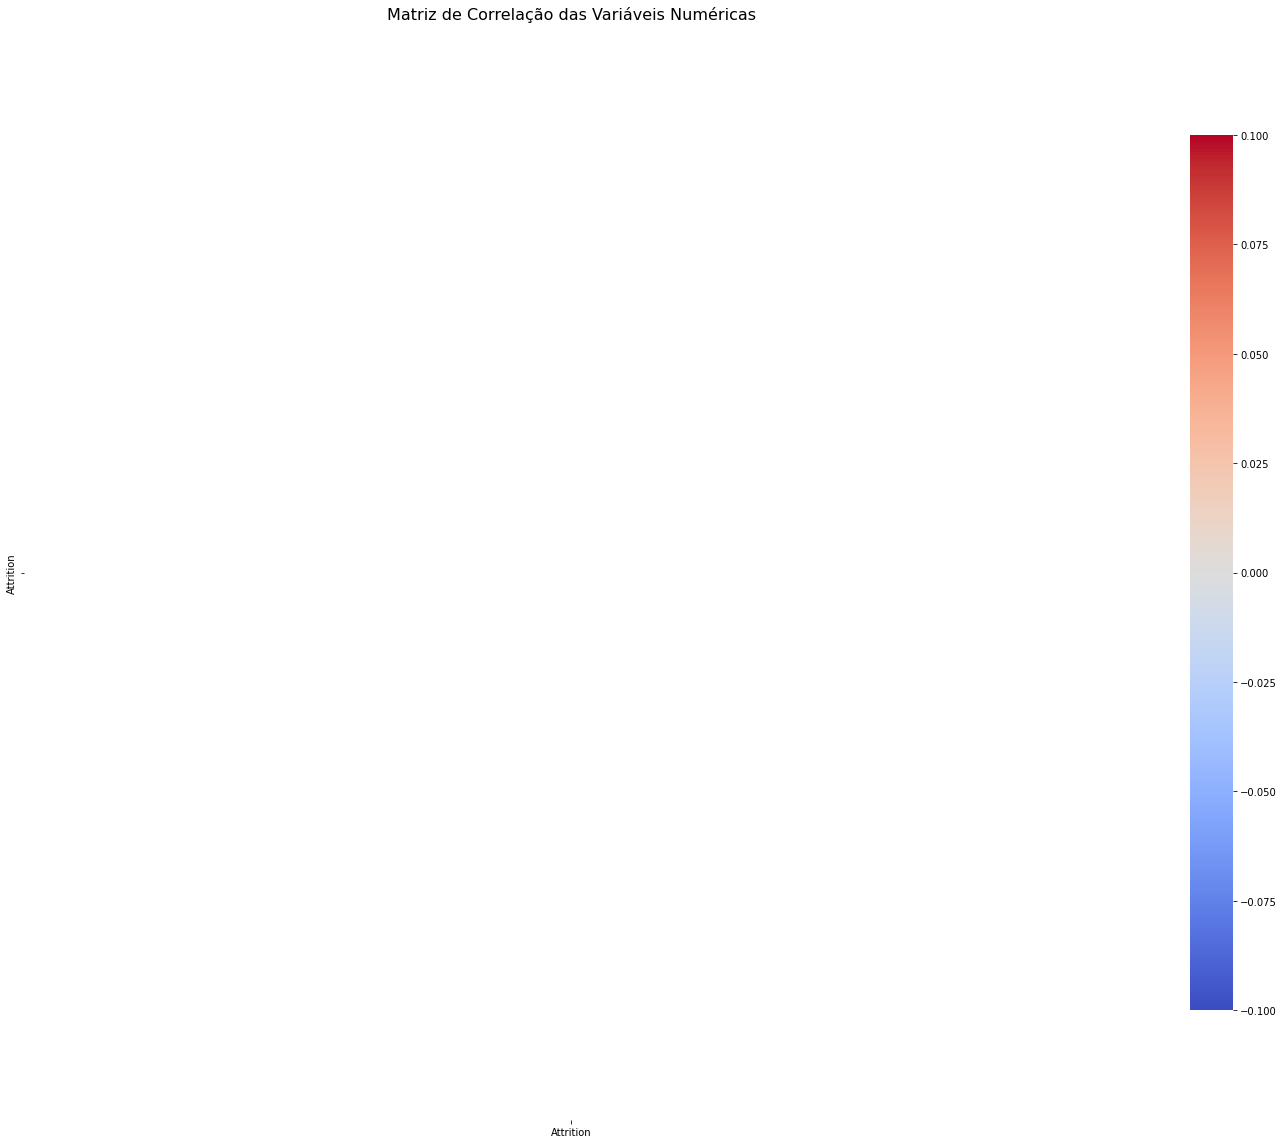

In [28]:
plt.figure(figsize=(20, 16))
correlation_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

## Variaveis com redundância de informação:
- TotalWorkingYear X Age
- MonthlyIncome X JobLevel

## Analise variáveis categoricas

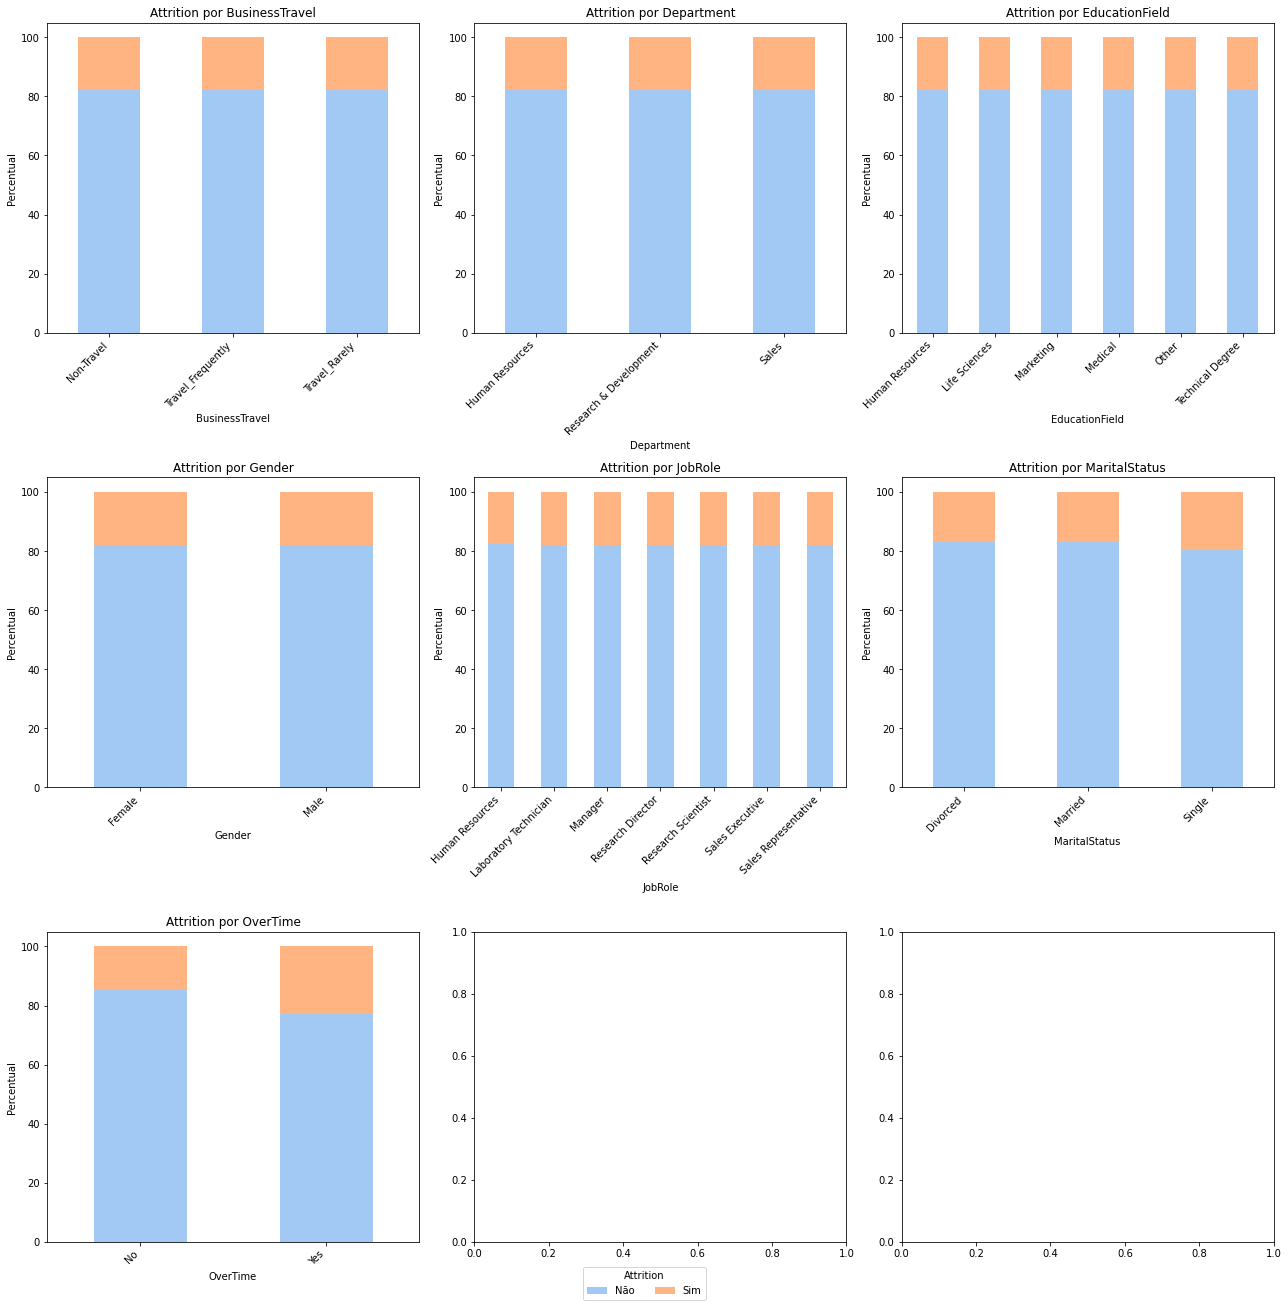

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    crosstab = pd.crosstab(df[col], df['Attrition'])
    crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
    
    colors = sns.color_palette("pastel")
    crosstab_pct.plot(kind='bar', ax=axes[idx], stacked=True, color=colors, legend=False)
    
    axes[idx].set_title(f'Attrition por {col}')
    axes[idx].set_ylabel('Percentual')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')

    
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Não', 'Sim'], title='Attrition', loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.01))

plt.tight_layout(rect=[0, 0.05, 1, 1]) 
plt.tight_layout()
plt.show()

### Variáveis que indicam estarem correlacionadas com attrition
- OverTime
- MaritalStatus

# Feature Engineering

`YearsInCompanyRatio` = YearsAtCompany / TotalWorkingYears
- Proporção do tempo total de trabalho que o funcionário passou na empresa atual. Pode indicar fidelidade ou estagnação.

`YearsWithoutPromotion` = YearsAtCompany - YearsSinceLastPromotion
- Tempo na empresa sem receber promoção. Pode indicar desmotivação.

`AvgYearsPerCompany` = TotalWorkingYears / (NumCompaniesWorked + 1)
- Estima a média de anos trabalhados por empresa (evita divisão por zero). Pode mostrar estabilidade ou propensão a trocar de empresa.

`IncomeToLevelRatio` = MonthlyIncome / (JobLevel + 1)
- Compara o nível de cargo com a remuneração. Salários abaixo da média para o nível podem causar insatisfação.

`SatisfactionScore` = média de (EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction)
- Agrega múltiplas métricas subjetivas de satisfação para identificar perfis propensos ao attrition.

`IsRecentlyPromoted` = 1 se YearsSinceLastPromotion <= 1, senão 0
- Identifica quem foi promovido recentemente — potencial indicador de retenção.

`IsSenior` = 1 se TotalWorkingYears > 10 e JobLevel > 3, senão 0
- Cria uma flag para funcionários mais experientes e em cargos superiores.

`PromotionFrequency` = TotalWorkingYears / (YearsSinceLastPromotion + 1)
- Estimativa de frequência de promoções ao longo da carreira.

`TenureInCurrentRoleRatio` = YearsInCurrentRole / (YearsAtCompany + 1)
- Proporção do tempo na empresa que foi passado no cargo atual. Pode indicar estagnação.

`IsMidCareer` = 1 se 30 <= Age <= 45, senão 0
- Agrupa faixa etária comum de maior rotatividade por busca de crescimento.

In [30]:
# Criando novas features
df["YearsInCompanyRatio"] = (df["YearsAtCompany"] / df["TotalWorkingYears"]).round(2).fillna(0)
df["YearsWithoutPromotion"] = df["YearsAtCompany"] - df["YearsSinceLastPromotion"]
df["AvgYearsPerCompany"] = df["TotalWorkingYears"] / (df["NumCompaniesWorked"] +1) # o 1 é para evitar casos de 0 e incluir a companhia na conta
df["IncomeToLevelRatio"] = df["MonthlyIncome"] / (df["JobLevel"] +1)
df["SatisfactionScore"] = (df["EnvironmentSatisfaction"] + df["JobSatisfaction"] + df["RelationshipSatisfaction"])/3
df["IsRecentlyPromoted"] = df["YearsSinceLastPromotion"].apply(lambda x: 1 if x <= 1 else 0)
df["IsSenior"] = df.apply(lambda x: 1 if x['TotalWorkingYears'] > 10 and x['JobLevel'] > 3 else 0, axis=1)
df["PromotionFrequency"] = df["TotalWorkingYears"] / (df["YearsSinceLastPromotion"] +1)
df["TenureInCurrentRoleRatio"] = df["YearsInCurrentRole"] / (df["YearsAtCompany"] +1)
df["IsMidCareer"] = df["Age"].apply(lambda x: 1 if 30 <= x <= 45 else 0)

In [31]:
print("ANÁLISE DE VALORES AUSENTES")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("Não há valores ausentes no dataset!")
else:
    print(missing_values[missing_values > 0])

ANÁLISE DE VALORES AUSENTES
Não há valores ausentes no dataset!


# Get Dummies
- Transformar variáveis categóricas em variáveis numéricas binárias 

In [32]:
df_dummy = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(int)

### Verificando importancia de variáveis com novas features

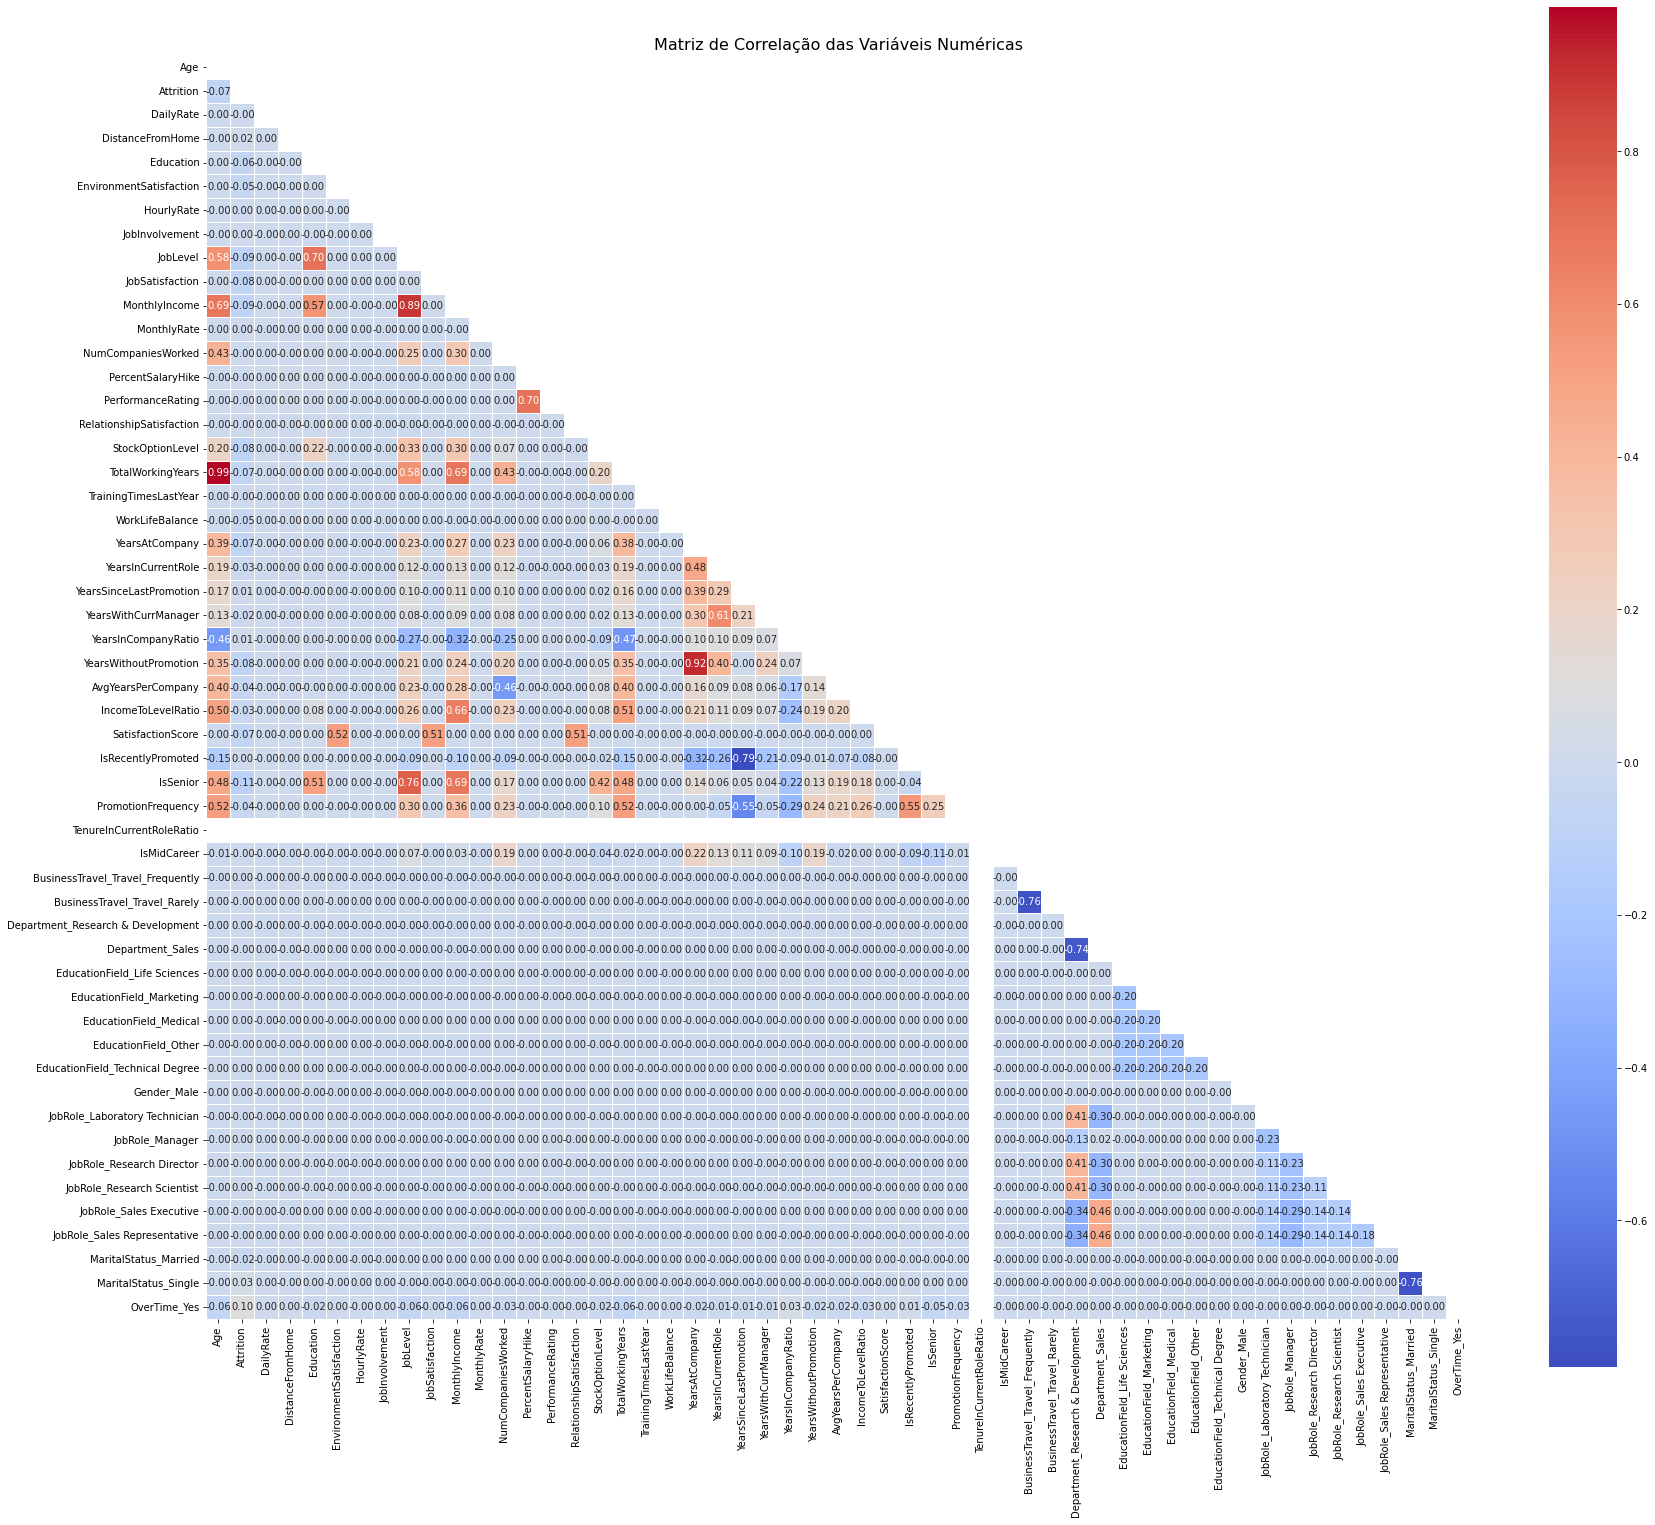

In [33]:
# Matriz de correlação
plt.figure(figsize=(25, 25))
correlation_matrix = df_dummy.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

## Variaveis com redundância de informação:
- YearsWithoutPromotion X YearsAtCompany
- TotalWorkingYear X Age
- MonthlyIncome X JobLevel

In [34]:
# variavel com mesmo valor TenureInCurrentRoleRatio
df_dummy["TenureInCurrentRoleRatio"].value_counts()

TenureInCurrentRoleRatio
0    1000000
Name: count, dtype: int64

### Correlaçao de pearson

In [35]:
importante_pearson = df_dummy.corr()[["Attrition"]].sort_values(by=["Attrition"])
importante_pearson = importante_pearson.reset_index()

In [36]:
importante_pearson = importante_pearson[importante_pearson["Attrition"] < 1]

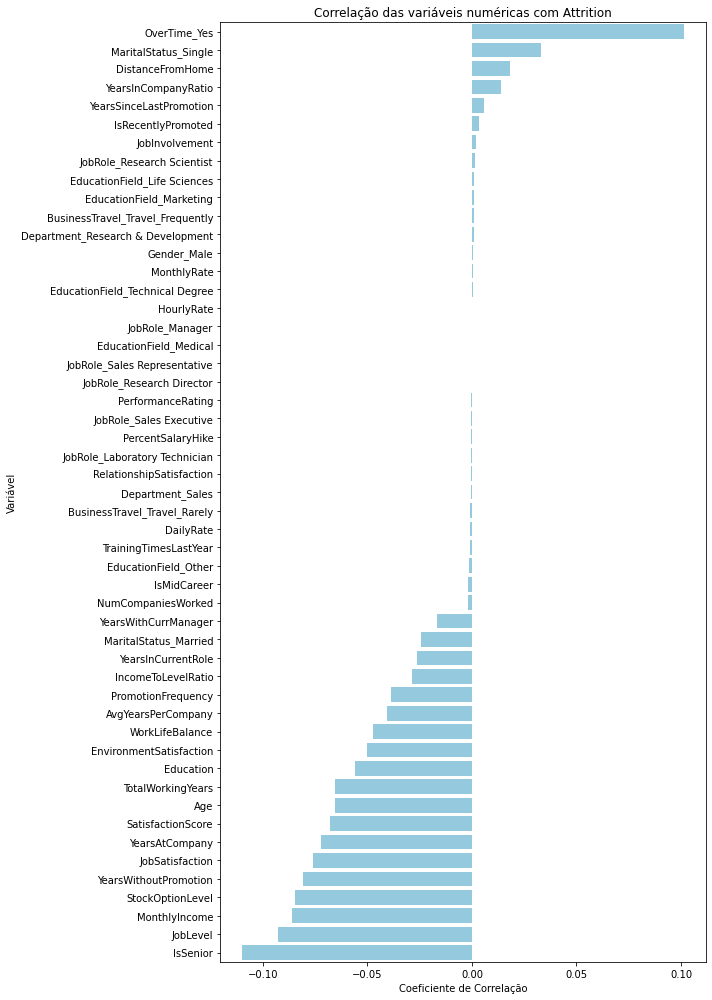

In [37]:
plt.figure(figsize=(10, 14))
sns.barplot(data=importante_pearson.sort_values(by="Attrition", ascending=False),
            x='Attrition', 
            y='index', 
            color='skyblue')

plt.title("Correlação das variáveis numéricas com Attrition")
plt.xlabel("Coeficiente de Correlação")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

In [38]:
importante_pearson

,index,Attrition
0,IsSenior,-0.109827
1,JobLevel,-0.092708
2,MonthlyIncome,-0.086183
3,StockOptionLevel,-0.084746
4,YearsWithoutPromotion,-0.080669
5,JobSatisfaction,-0.076181
6,YearsAtCompany,-0.072059
7,SatisfactionScore,-0.067872
8,Age,-0.065667
9,TotalWorkingYears,-0.065375


### Feature importance com árvore de decisão
- Medir importância baseada em "ganho de informação"

In [39]:
X = df_dummy.drop(columns='Attrition')
y = df_dummy['Attrition']
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

<AxesSubplot:>

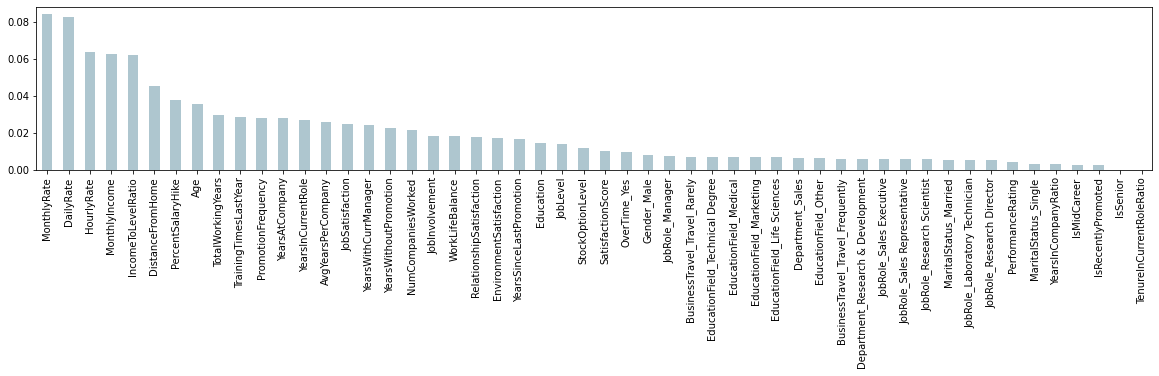

In [40]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(20, 3), color='#AEC6CF')

In [41]:
important_tree = importances[importances > 0.01]
important_tree.sort_values(ascending=False)

MonthlyRate                 0.083866
DailyRate                   0.082686
HourlyRate                  0.063578
MonthlyIncome               0.062519
IncomeToLevelRatio          0.061717
DistanceFromHome            0.045248
PercentSalaryHike           0.037882
Age                         0.035306
TotalWorkingYears           0.029466
TrainingTimesLastYear       0.028626
PromotionFrequency          0.027800
YearsAtCompany              0.027724
YearsInCurrentRole          0.026912
AvgYearsPerCompany          0.025810
JobSatisfaction             0.024647
YearsWithCurrManager        0.023877
YearsWithoutPromotion       0.022611
NumCompaniesWorked          0.021309
JobInvolvement              0.018121
WorkLifeBalance             0.017938
RelationshipSatisfaction    0.017683
EnvironmentSatisfaction     0.017297
YearsSinceLastPromotion     0.016764
Education                   0.014360
JobLevel                    0.014087
StockOptionLevel            0.011594
SatisfactionScore           0.010010
d

# Preparação dos dados para modelagem

### Selecionando colunas mais importantes

In [42]:
# colunas pelo feature importance
list_important_tree = important_tree[important_tree > 0.028].index.to_list()

In [43]:
# colunas pela correlação de person
list_important_person_negative = importante_pearson[importante_pearson["Attrition"] < -0.028]["index"].to_list()
importante_pearson_positive = importante_pearson[importante_pearson["Attrition"] > 0.013]["index"].to_list()

In [44]:
# agrupando colunas
columns_to_model = list(set(list_important_tree +list_important_person_negative + importante_pearson_positive+ ["Attrition"]))

#### Variaveis com redundância de informação:
- YearsWithoutPromotion X YearsAtCompany
- TotalWorkingYears X Age
- MonthlyIncome X JobLevel

In [45]:
columns_to_model_w = [x for x in columns_to_model if x not in["YearsWithoutPromotion", "TotalWorkingYears", "JobLevel"]]

# Removendo outliers

In [46]:
variaveis_numericas = ['MonthlyIncome','DistanceFromHome']

# Copia do DataFrame original para não perder os dados
df_sem_outliers = df_dummy.copy()

# Para cada variável, aplica a regra do IQR
for col in variaveis_numericas:
    Q1 = df_sem_outliers[col].quantile(0.25)
    Q3 = df_sem_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Remove os outliers dessa variável
    df_sem_outliers = df_sem_outliers[
        (df_sem_outliers[col] >= limite_inferior) & (df_sem_outliers[col] <= limite_superior)
    ]

In [47]:
print(f"Quantidade de linhas removidas: {df_dummy.shape[0] - df_sem_outliers.shape[0]}")

Quantidade de linhas removidas: 65459


In [48]:
df_dummy['Attrition'].value_counts()

Attrition
0    821159
1    178841
Name: count, dtype: int64

In [49]:
df_sem_outliers['Attrition'].value_counts()

Attrition
0    769486
1    165055
Name: count, dtype: int64

# Exportando dados

### Dados para modelo baseline

In [50]:
pd.DataFrame(df_sem_outliers, columns=df_sem_outliers.columns).to_parquet('./data/dados_para_modelo_baseline.parquet')

### Dados para modelos

In [51]:
#filtra colunas escolhidas
df_model = df_sem_outliers[columns_to_model_w]

In [52]:
#separa a variável target
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

In [53]:
#separa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (747632, 22)
Tamanho do conjunto de teste: (186909, 22)


### Aplica normalização para os dados

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resumo final

In [55]:
print("RESUMO DA PREPARAÇÃO")
print(f"Total de features: {X_train.shape[1]}")
print(f"Proporção Attrition no treino: {y_train.mean():.2%}")
print(f"Proporção Attrition no teste: {y_test.mean():.2%}")

RESUMO DA PREPARAÇÃO
Total de features: 22
Proporção Attrition no treino: 17.66%
Proporção Attrition no teste: 17.66%


### Verificando feature imporantace

In [56]:
rf_quick = RandomForestClassifier(n_estimators=100, random_state=42)
rf_quick.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [57]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_quick.feature_importances_
}).sort_values('importance', ascending=False).head(20)

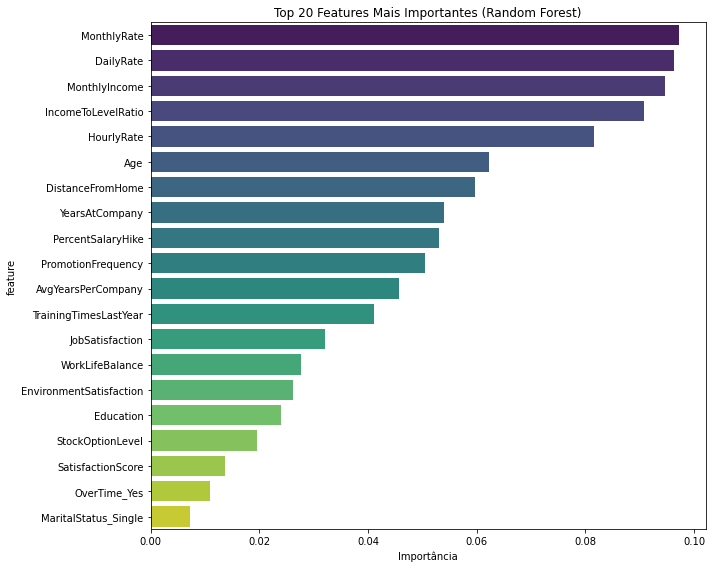

In [58]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=feature_importance,
    x='importance',
    y='feature',
    hue='feature',
    palette='viridis',
    legend=False
)
plt.title('Top 20 Features Mais Importantes (Random Forest)')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

# Salvando os dados processados

In [59]:
# Criando diretórios
os.makedirs('./data/processed', exist_ok=True)
os.makedirs('./models', exist_ok=True)

In [60]:
# Salvando datasets
pd.DataFrame(X_train_scaled, columns=X_train.columns).to_parquet('./data/processed/X_train.parquet')
pd.DataFrame(X_test_scaled, columns=X_test.columns).to_parquet('./data/processed/X_test.parquet')
y_train.to_frame().to_parquet('./data/processed/y_train.parquet')
y_test.to_frame().to_parquet('./data/processed/y_test.parquet')

In [61]:
# Salvando o scaler e label encoder
import joblib
joblib.dump(scaler, './models/scaler.pkl')

['./models/scaler.pkl']